In [19]:
#inporting the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [38]:
#calling the dataframe after transforming into a pandas DataFrame
df = pd.read_csv('/content/winequality-red.csv')

# Data Preprocessing

In [39]:
df.shape

(1599, 12)

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [63]:
#Splitting the labels from data
X= df.drop(columns = 'quality', axis =1)
y= df['quality']

# Scaling and Resolving the Outliers

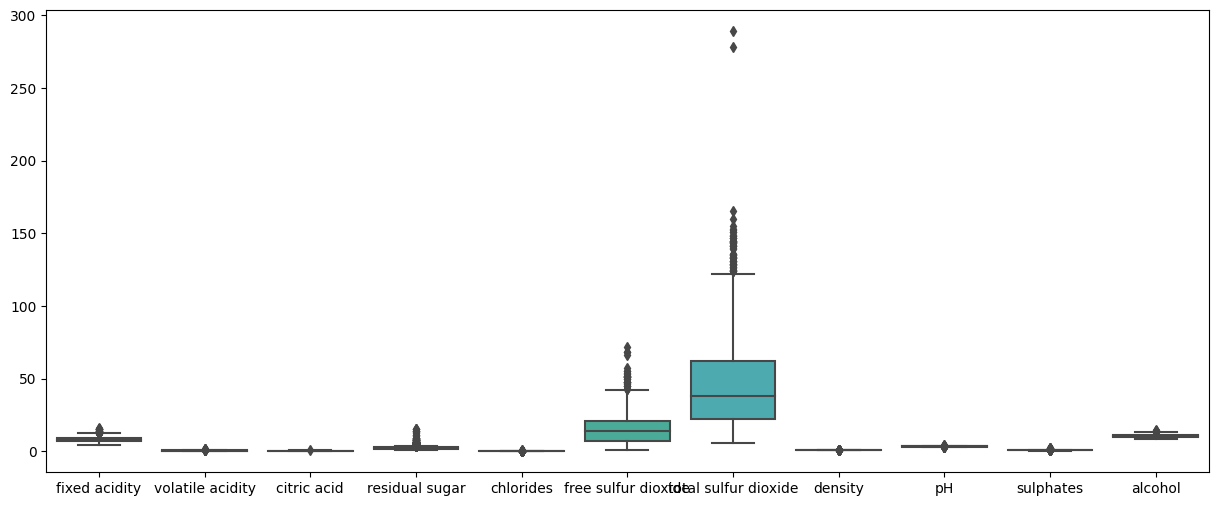

In [43]:
plt.figure(figsize=(15,6))
sns.boxplot(X)
plt.show()

In [69]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
X_scaled

array([[-0.23809524,  0.72      , -0.78787879, ...,  1.05263158,
        -0.33333333, -0.5       ],
       [-0.04761905,  1.44      , -0.78787879, ..., -0.57894737,
         0.33333333, -0.25      ],
       [-0.04761905,  0.96      , -0.66666667, ..., -0.26315789,
         0.16666667, -0.25      ],
       ...,
       [-0.76190476, -0.04      , -0.39393939, ...,  0.57894737,
         0.72222222,  0.5       ],
       [-0.95238095,  0.5       , -0.42424242, ...,  1.36842105,
         0.5       ,  0.        ],
       [-0.9047619 , -0.84      ,  0.63636364, ...,  0.42105263,
         0.22222222,  0.5       ]])

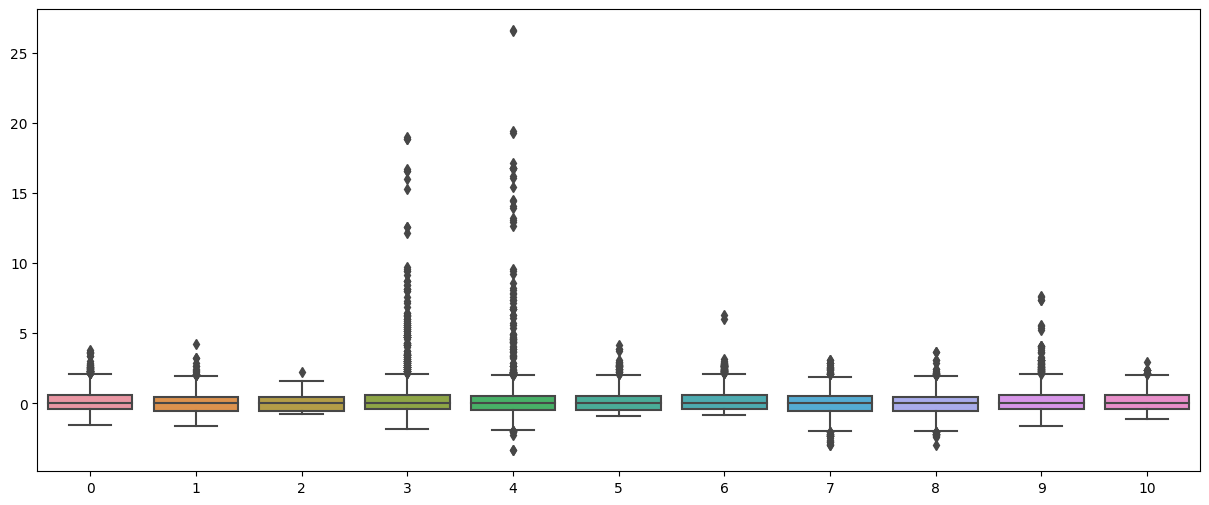

In [46]:
plt.figure(figsize=(15,6))
sns.boxplot(X_scaled)
plt.show()

In [47]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# Visualizing the Features using a heatmap

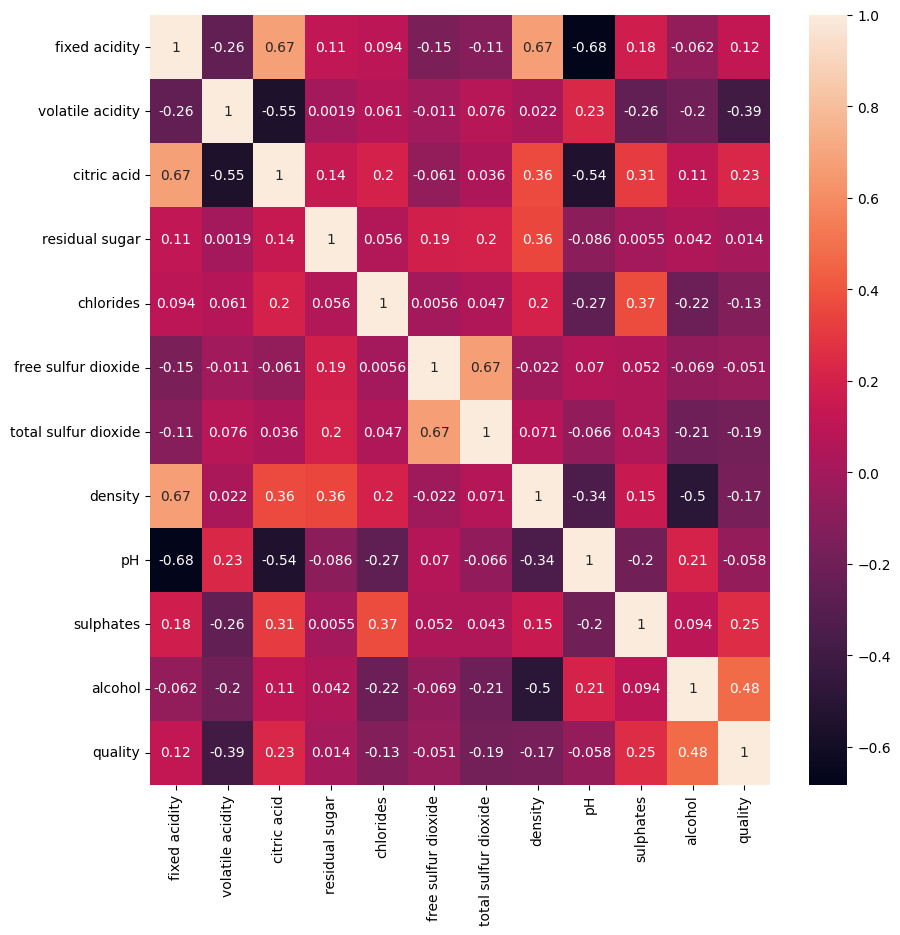

In [48]:
corr_mat = df.corr()
plt.figure(figsize= (10,10))
sns.heatmap(corr_mat, annot = True)
plt.show()

In [49]:
#splitting the dataset into train and tset split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2)

# Model Prediction

In [76]:
#SVR
model_svr = SVR(kernel = 'rbf')
model_svr.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"SVR: Mean Squared Error - {mse}")

#XGB
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"XGB: Mean Squared Error - {mse}")


SVR: Mean Squared Error - 0.327180226927144
XGB: Mean Squared Error - 0.327180226927144


# Prediction function

In [78]:
#prediction function
input_data= [7.4,	0.70,	0.00,	1.9,	0.076,	11.0,	34.0,	0.9978,	3.51,	0.56,	9.4] #output is 5

def print_model_pred(input_data):
  input_data = np.asarray(input_data)
  input_data = input_data.reshape(1,-1)
  input_data = scaler.transform(input_data)
  pred_svr = model_svr.predict(input_data)
  pred_xgb = model_xgb.predict(input_data)
  print(f"The prediction value of SVR is : {pred_svr} \n The prediction value of XGB is : {pred_xgb} ")

In [79]:
print_model_pred(input_data)

The prediction value of SVR is : [5.0307161] 
 The prediction value of XGB is : [4.9813123] 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
